<a href="https://colab.research.google.com/github/Melaka36/CodeZ/blob/main/SVM_SMOTE_Model_Training(Without_CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns # data visualization

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
df=pd.read_csv("drive/MyDrive/4th_Year_Research/Implementation/Dataset/Pre-Processed-Dataset.csv")
df.shape

(3630, 25)

# Splitting data into X and Y

In [ ]:
#will drop the Nationality and International columns since they are highly correlated and only one nationality significantly dominates the data.
X = df.drop(columns=['Target'], axis=1)
Y = df['Target']

In [ ]:
X.shape

(3630, 24)

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

In [ ]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64



---

# Splitting Data Into Training and Testing

---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 24) (2904, 24) (726, 24)


# SVM_SMOTE

In [ ]:
# Initialize SVM SMOTE
svm_smote = SVMSMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)

# Apply SVM SMOTE to the training data
X_train_resampled, Y_train_resampled = svm_smote.fit_resample(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


# **Model Training**

In [ ]:
X_train = X_train_resampled
Y_train = Y_train_resampled

In [ ]:
count_of_ones = (Y_train == 1).sum()
count_of_zeros = (Y_train == 0).sum()
print(f"Number of rows with Target = 0: {count_of_zeros}")
print(f"Number of rows with Target = 1: {count_of_ones }")

Number of rows with Target = 0: 1773
Number of rows with Target = 1: 1773


In [ ]:
print(X_train.shape, Y_train.shape,)

(3546, 24) (3546,)


# Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)  # Increase max_iter value
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

Accuracy: 0.7603305785123967
Precision: 0.8004587155963303
Recall: 0.8004587155963303
F1-Score: 0.8004587155963303
ROC-AUC: 0.7502293577981651


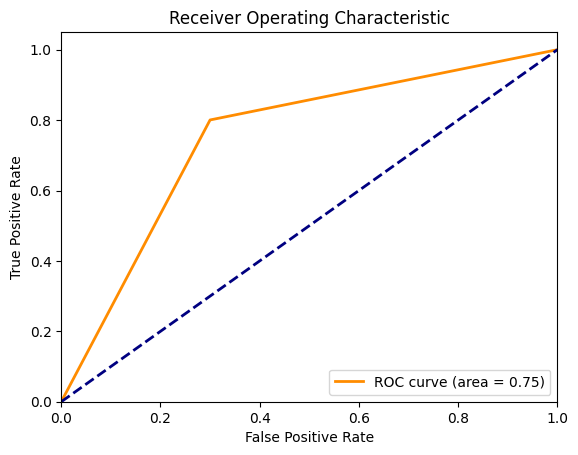

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[203  87]
 [ 87 349]]


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without Cross Validation: ",accuracy_score(Y_test,y_pred))

Without Scaling and without Cross Validation:  0.7410468319559229


Accuracy: 0.7410468319559229
Precision: 0.7831050228310502
Recall: 0.786697247706422
F1-Score: 0.7848970251716247
ROC-AUC: 0.7295555204049351


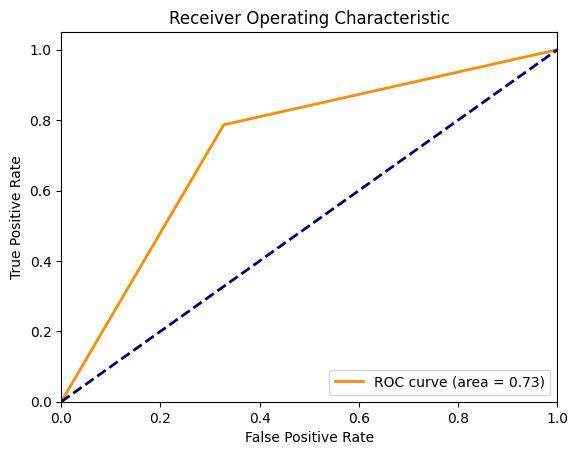

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[195  95]
 [ 93 343]]


<Axes: >

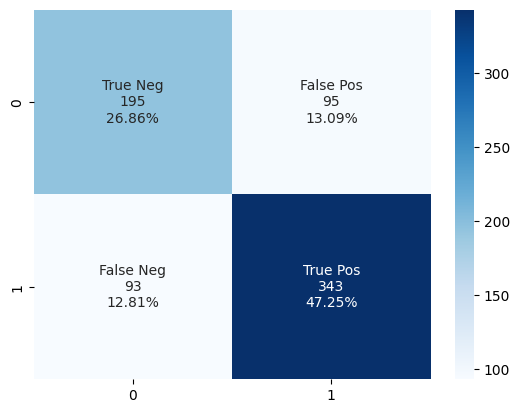

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.8292011019283747
Without Scaling and With CV:  0.8378769793904672


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)



Accuracy: 0.8292011019283747
Precision: 0.8406113537117904
Recall: 0.8830275229357798
F1-Score: 0.861297539149888
ROC-AUC: 0.8156516925023727


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[217  73]
 [ 51 385]]


# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)


Accuracy: 0.7988980716253443
Precision: 0.8295454545454546
Recall: 0.8371559633027523
F1-Score: 0.8333333333333334
ROC-AUC: 0.7892676368237901


# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# # Plot ROC Curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

Accuracy: 0.7424242424242424
Precision: 0.749498997995992
Recall: 0.8577981651376146
F1-Score: 0.8
ROC-AUC: 0.713381841189497


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[165 125]
 [ 62 374]]


<Axes: >

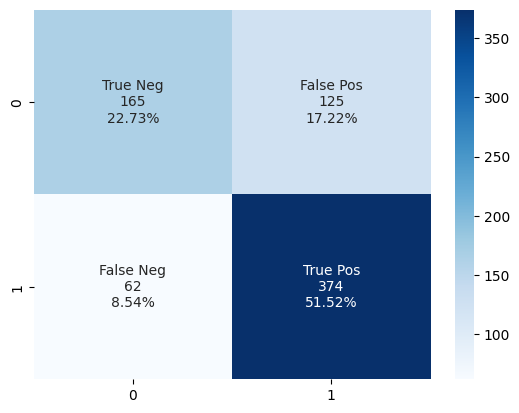

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# XGBoost

In [ ]:
bin_log = xgb.XGBClassifier(
    n_estimators=100,  # Adjust the number of estimators (trees) as needed
    max_depth=5,  # Adjust the depth of the trees as needed
    learning_rate=0.1,  # Adjust the learning rate as needed
    objective='binary:logistic',  # Use 'binary:logistic' for binary classification
    random_state=42  # Set a random seed for reproducibility
)
bin_log.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
target_prediction = bin_log.predict(X_test)
# print(target_prediction)

In [ ]:
data_accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", data_accuracy)

Accuracy: 0.8264462809917356


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8264462809917356
Precision: 0.8384279475982532
Recall: 0.8807339449541285
F1-Score: 0.8590604026845637
ROC-AUC: 0.8127807655805125


# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier on the training data
gb_classifier.fit(X_train, Y_train)

# Make predictions on the test data
target_prediction = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8443526170798898


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8443526170798898
Precision: 0.8549450549450549
Recall: 0.8922018348623854
F1-Score: 0.8731762065095399
ROC-AUC: 0.8323078139829169


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


# CatBoost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100,  # Adjust the number of iterations as needed
                           depth=5,  # Adjust the depth of the trees as needed
                           learning_rate=0.1,  # Adjust the learning rate as needed
                           loss_function='Logloss',  # Use 'Logloss' for binary classification
                           random_seed=42)   # Set a random seed for reproducibility

model.fit(X_train, Y_train)

target_prediction = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy:.6f}')

0:	learn: 0.6370226	total: 48.8ms	remaining: 4.83s
1:	learn: 0.5934732	total: 52ms	remaining: 2.55s
2:	learn: 0.5599420	total: 53.6ms	remaining: 1.73s
3:	learn: 0.5313049	total: 55.3ms	remaining: 1.33s
4:	learn: 0.5091627	total: 56.7ms	remaining: 1.08s
5:	learn: 0.4961706	total: 58.1ms	remaining: 910ms
6:	learn: 0.4823503	total: 59.5ms	remaining: 791ms
7:	learn: 0.4681947	total: 60.9ms	remaining: 700ms
8:	learn: 0.4609702	total: 62.2ms	remaining: 629ms
9:	learn: 0.4496249	total: 63.6ms	remaining: 573ms
10:	learn: 0.4432581	total: 65ms	remaining: 526ms
11:	learn: 0.4355350	total: 66.3ms	remaining: 486ms
12:	learn: 0.4288825	total: 67.7ms	remaining: 453ms
13:	learn: 0.4249001	total: 69ms	remaining: 424ms
14:	learn: 0.4191583	total: 70.4ms	remaining: 399ms
15:	learn: 0.4159040	total: 71.7ms	remaining: 376ms
16:	learn: 0.4114544	total: 73ms	remaining: 357ms
17:	learn: 0.4085729	total: 74.4ms	remaining: 339ms
18:	learn: 0.4014865	total: 75.7ms	remaining: 323ms
19:	learn: 0.3993569	total: 77

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8415977961432507
Precision: 0.8527472527472527
Recall: 0.8899082568807339
F1-Score: 0.8709315375982043
ROC-AUC: 0.8294368870610566


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=300,  # Adjust the number of estimators (trees) as needed
                  learning_rate=0.1) # Adjust the learning rate as needed

model.fit(X_train, Y_train)

target_prediction = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy:.6f}')

Accuracy: 0.818182


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8181818181818182
Precision: 0.8333333333333334
Recall: 0.8715596330275229
F1-Score: 0.852017937219731
ROC-AUC: 0.8047453337551407
